In [47]:
from astropy.io import fits
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import vq, kmeans
import scipy
from astroquery.gaia import Gaia
import os

import match

INT_DATA_PATH = "../../int_data/"

# Global Parameters
BAND = 'i'
PSF_DATA_FILEPATH = "../../psf_data/psf_y3a1-v29.fits"
RESULTS_FILEPATH = "../results/"
TOTAL_SUBSAMPLE_SIZE = 10000
MATCH_LIM = 1 * u.arcsec
INT_DATA_PATH = "../../int_data/"

In [48]:
# Alter results filepath to include band
RESULTS_FILEPATH_BAND = RESULTS_FILEPATH + str(BAND) + "band" + "/"
INT_DATA_PATH_BAND = INT_DATA_PATH + str(BAND) + "band" + "/"

In [49]:
def read_des_fits(file_path, band, n = int(1e6)):
    """
    Read in the DES fits file and return a pandas dataframe with ra, dec, mag and band columns.
    Args: 
        file_path: path to the fits file
        band: band to be read in
        n: subsample of stars to be read in within specified band
    Returns:
        des: pandas dataframe with ra, dec, mag and band columns
    """
    
    # Read in the fits file and close it
    hdul = fits.open(file_path)
    
    # hdul[1].data is a numpy recarray. Get the ra, dec, mag and band columns   
    cols = ['ra', 'dec', 'mag', 'band']
    zidx = np.random.choice(np.where(hdul[1].data['band'] == band)[0], size = n, replace = False)
    data = {col: hdul[1].data[col][zidx] for col in cols}
    hdul.close()

    des = pd.DataFrame(data)
    

    # Combine ra and dec into a sky coord array
    des['coord'] = SkyCoord(ra=des['ra'], dec=des['dec'], unit = 'deg')
    return des

print("Starting DES Gaia Crossmatch for Band " + str(BAND) + ".")

# Read in DES Data
des = read_des_fits(PSF_DATA_FILEPATH, BAND, n = TOTAL_SUBSAMPLE_SIZE)
print("Data read in.")

Starting DES Gaia Crossmatch for Band i.
Data read in.


In [6]:
# Load centroids array from int_data
centroids = np.load(INT_DATA_PATH + "centroids.npy")

In [7]:
# Get assignments for all stars in DES
cluster_num_array, cluster_info = match.get_assignments(des, centroids)
print("DES Stars Assigned.")

Stars clustered.
DES Stars Assigned.


In [8]:
import importlib
importlib.reload(match)

<module 'match' from '/home/shrihan/weaklens/gaia_match_psf/gaia_match_psf_code/src/match.py'>

In [10]:
for i in range(10):
    print("Cluster " + str(i) + ":", end = ' ')
    gaia0_tab = pd.read_feather(INT_DATA_PATH + "gaia/" + "gaia" + str(i) + ".feather")
    comb_clusteri = match.match_cluster_to_gaia(gaia0_tab, des, cluster_num_array, cluster_info, i)
    print("Matched.")
    comb_clusteri.to_csv(INT_DATA_PATH + str(BAND) + "data/" + "cluster_" + str(BAND) + "_" + str(i) + ".csv")
    

Cluster 0: Matched.
Cluster 1: Matched.
Cluster 2: Matched.
Cluster 3: Matched.
Cluster 4: Matched.
Cluster 5: Matched.
Cluster 6: Matched.
Cluster 7: Matched.
Cluster 8: Matched.
Cluster 9: Matched.


In [26]:
import os

gfiles = os.listdir(INT_DATA_PATH + "gaia/")
gfiless = sorted(gfiles, key=lambda x: int(x.split(".")[0].split("gaia")[1]))


In [27]:
for i in gfiless:
    gaia0_tab = pd.read_feather(INT_DATA_PATH + "gaia/" + i)
    if len(gaia0_tab) > 999999:
        print(i)

gaia88.feather
gaia166.feather


In [2]:
import healpy as hp
import numpy as np

In [39]:
NSIDE = 8
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 8 is 7.3 deg


In [40]:
hp.nside2pixarea(NSIDE, degrees = True)  

53.714793293514674

In [41]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

768


In [78]:
import pandas as pd
INT_DATA_PATH = "../../int_data/"
d1 = pd.read_feather(INT_DATA_PATH + "gaia/" + "gaia" + str(0) + ".feather")

In [82]:
NSIDE = 10
hpix  = hp.ang2pix(NSIDE, des['ra'], des['dec'], lonlat = True)

In [83]:
idx = hpix.unique()

198


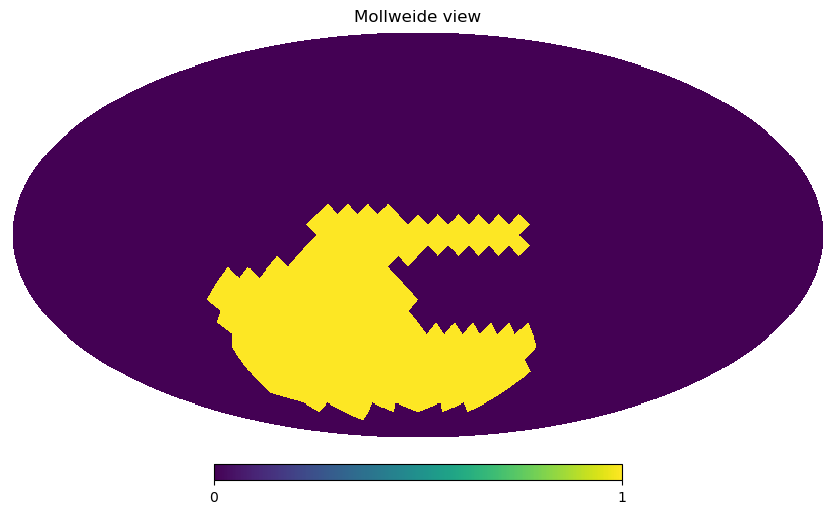

In [85]:
NPIX = hp.nside2npix(NSIDE)

m = np.zeros(NPIX)
m[idx] = 1
hp.mollview(m)
print(len(idx))

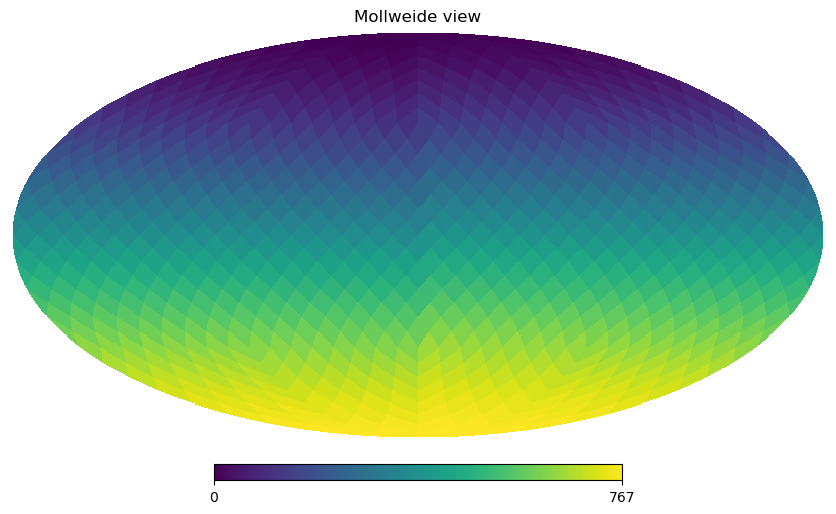

In [65]:
hp.mollview(np.arange(NPIX))